Found 6400 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.
🔍 Extracting VGG16 Features...
🔍 Extracting ResNet50 Features...


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_8 (Cast)                   │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_9 (Cast)                   │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_10 (Cast)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_11 (Cast)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,443,588 (5.51 MB)

 Trainable params: 1,443,588 (5.51 MB)

 Non-trainable params: 0 (0.00 B)


🚀 Training Started...
Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.2656 - loss: 1.4886 - val_accuracy: 0.2937 - val_loss: 1.3642 - learning_rate: 5.0000e-05
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.2927 - loss: 1.3967 - val_accuracy: 0.4437 - val_loss: 1.3368 - learning_rate: 5.0000e-05
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.3290 - loss: 1.3508 - val_accuracy: 0.4050 - val_loss: 1.2835 - learning_rate: 5.0000e-05
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.3861 - loss: 1.3086 - val_accuracy: 0.5738 - val_loss: 1.2082 - learning_rate: 5.0000e-05
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4837 - loss: 1.2309 - val_accuracy: 0.6475 - val_loss: 1.1152 - learning_rate: 5.0000e-05
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5262 - loss: 1.1524 - val_accuracy: 0.6325 - val_loss: 1.0352 - learning_rate: 5.0000e-05
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━

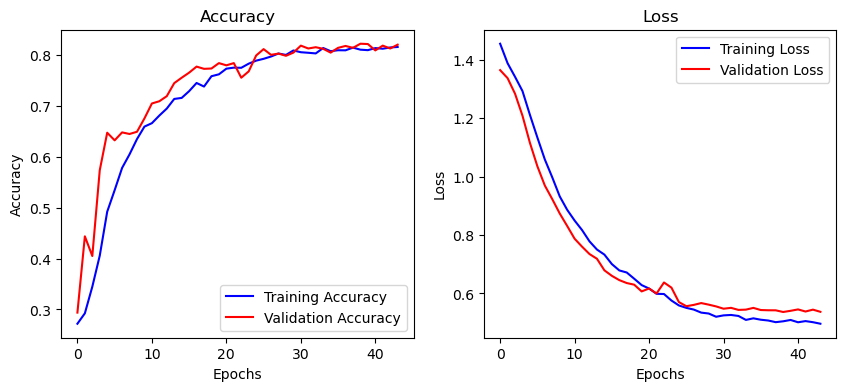

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
**Classification Report:**
              precision    recall  f1-score   support

         CNV       0.84      0.88      0.86       400
         DME       0.85      0.77      0.81       400
      DRUSEN       0.81      0.73      0.77       400
      NORMAL       0.79      0.91      0.85       400

    accuracy                           0.82      1600
   macro avg       0.82      0.82      0.82      1600
weighted avg       0.82      0.82      0.82      1600



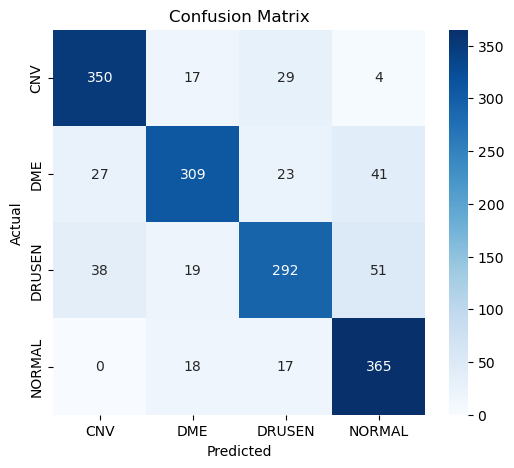

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8409 - loss: 0.4984
Validation Accuracy: 0.8225


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import Dense, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

#  XLA for Speed Optimization
tf.config.optimizer.set_jit(True)

#  Mixed Precision for Faster Computation
tf.keras.mixed_precision.set_global_policy('mixed_float16')

#  Define Input Shape
input_shape = (224, 224, 3)
num_classes = 4

#  Load Pre-trained VGG16 & ResNet50 (without top layers)
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

#  Add GlobalAveragePooling2D to reduce dimensions
vgg16 = Model(inputs=vgg16.input, outputs=GlobalAveragePooling2D()(vgg16.output))
resnet50 = Model(inputs=resnet50.input, outputs=GlobalAveragePooling2D()(resnet50.output))

#  Unfreeze Last 4 Layers for Fine-Tuning
for layer in vgg16.layers[-4:]:
    layer.trainable = True

for layer in resnet50.layers[-4:]:
    layer.trainable = True

#  Dataset Path
data_dir = "D:/PROJECT/OCT2/train1"
img_size = (224, 224)
batch_size = 32

# Preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='training', shuffle=True)

val_generator = datagen.flow_from_directory(
    data_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='validation', shuffle=False)

#  Precompute Features (Extract once and train on them)
def extract_features(generator, model):
    features, labels = [], []
    for batch_x, batch_y in generator:
        features.append(model.predict_on_batch(batch_x))  # Compute only once
        labels.append(batch_y)
        if len(features) * batch_size >= generator.samples:
            break  # Ensure no extra batches beyond dataset size
    return np.concatenate(features), np.concatenate(labels)

print("🔍 Extracting VGG16 Features...")
vgg16_features_train, y_train = extract_features(train_generator, vgg16)
vgg16_features_val, y_val = extract_features(val_generator, vgg16)

print("🔍 Extracting ResNet50 Features...")
resnet50_features_train, _ = extract_features(train_generator, resnet50)
resnet50_features_val, _ = extract_features(val_generator, resnet50)

# Concatenate Extracted Features
X_train = np.concatenate([vgg16_features_train, resnet50_features_train], axis=-1)
X_val = np.concatenate([vgg16_features_val, resnet50_features_val], axis=-1)

#  Define a Fully Connected Network
input_tensor = Input(shape=(X_train.shape[1],))
x = Dense(512, activation='relu', dtype='float32')(input_tensor)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu', dtype='float32')(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax', dtype='float32')(x)

#  Build & Compile Model
model = Model(inputs=input_tensor, outputs=output)
model.compile(optimizer=AdamW(learning_rate=5e-5, weight_decay=1e-6),
              loss='categorical_crossentropy', metrics=['accuracy'])

#  Print Model Summary
model.summary()

#  Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

#  Train Model (Significantly Faster)
print("\n🚀 Training Started...")
start_time = time.time()

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Increased epochs
    batch_size=32,
    callbacks=[early_stop, reduce_lr]
)

end_time = time.time()
print(f"\n✅ Training Completed in {end_time - start_time:.2f} seconds")

#  Save Model
model.save("oct10_hybrid_vgg16_resnet50.keras")

#  Plot Training Performance
def plot_training(history):
    plt.figure(figsize=(10, 4))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

#  Plot Results
plot_training(history)

#  Get Predictions
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)

#  Classification Report
class_labels = list(train_generator.class_indices.keys())
print("**Classification Report:**")
print(classification_report(y_true, y_pred, target_names=class_labels))

#  Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#  Final Validation Accuracy
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc:.4f}")